In [1]:
#import needed libraries
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

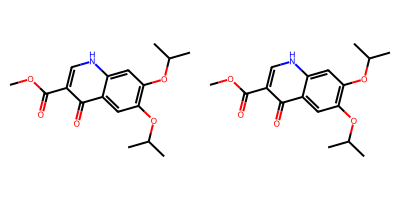

In [2]:
#test printing molecule
smiles = ['COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O', "COC(=O)c1c[nH]c2cc(OC(C)C)c(OC(C)C)cc2c1=O"]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [3]:
#import data
data_raw = pd.read_csv('tested_molecules.csv')
data_raw

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0
...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1


In [4]:
# Create dataframe

from main import create_dataframe

expanded_df = create_dataframe(data_raw)
expanded_df.head()

                                SMILES  PKM2_inhibition  ERK2_inhibition  \
0                 C=C(C)c1nc(N)nc(N)n1                0                0   
1       C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1                0                0   
2              C=CCNC(=O)CCCC(=O)NCC=C                0                0   
3  C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21                0                0   
4         C=CCn1cc(Cl)c(=O)n(CC=C)c1=O                0                0   

   MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           5.313889        5.313889           0.120833        0.120833   
1          11.238954       11.238954           0.225308       -0.366756   
2          11.090706       11.090706           0.049610       -0.049610   
3          11.892238       11.892238           0.076632       -0.457824   
4          11.693580       11.693580           0.012315       -0.498260   

        qed        SPS    MolWt  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0  0.592228   

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0,0,0,0,0,0,0,0,0,0


In [5]:

#a = rdkit.Chem.rdMolDescriptors.CalcExactMolWt(one_molecule)


In [6]:
# Hier moeten nog de outliers uitgehaald worden


In [7]:
# Monique toegevoegd

#scale data via standardize
from sklearn.preprocessing import StandardScaler

df = expanded_df.iloc[:,3:]

scaler_standardize = StandardScaler()
scaled_data_standardize = scaler_standardize.fit_transform(df)

# scale data via minmax scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# use PCA
pca = PCA()
pca.fit(scaled_data)

pca1 = PCA()
pca1.fit(scaled_data_standardize)

PCA()

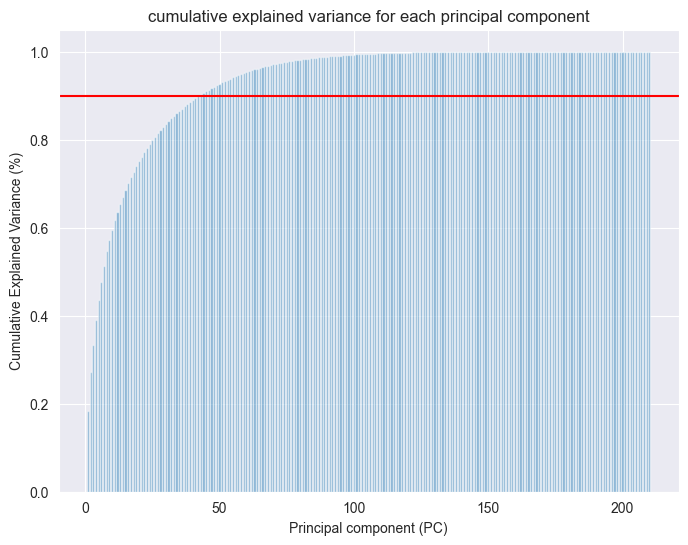

In [8]:
# MinMaxScaler

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.5, align='center')

plt.axhline(y=0.9,color='r',linestyle='-')
plt.xlabel('Principal component (PC)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('cumulative explained variance for each principal component')

plt.show()

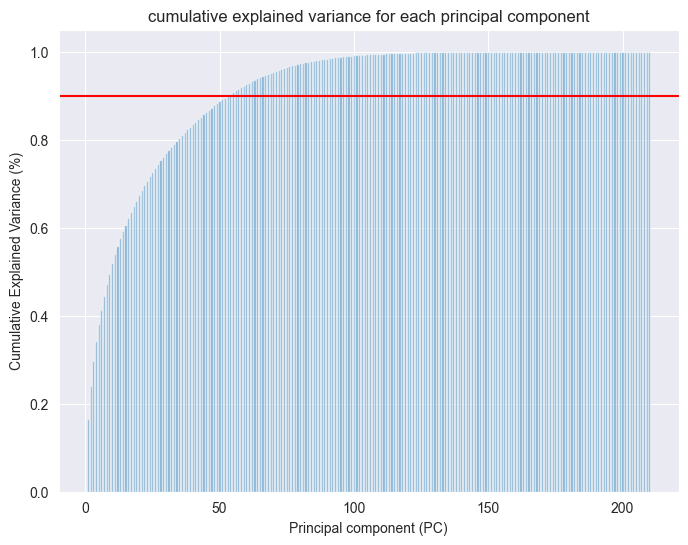

In [9]:
# Standardization scaler
cumulative_variance1 = np.cumsum(pca1.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cumulative_variance1) + 1), cumulative_variance1, alpha=0.5, align='center')

plt.axhline(y=0.9,color='r',linestyle='-')
plt.xlabel('Principal component (PC)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('cumulative explained variance for each principal component')

plt.show()

In [10]:
# Kijken welke het belangrijkste is in pc1
important_idx = np.argmax(np.abs(pca.components_[0]))
important_feature = df.columns[important_idx]
important_feature

'ExactMolWt'

In [11]:
# Kijken welke het minst belangrijkste is
important_idx = np.argmin(np.abs(pca.components_[0]))
important_feature = df.columns[important_idx]
important_feature

'NumRadicalElectrons'

In [12]:
# Nummer of Principal Components bij MinMaxScaling
num_components = np.argmax(cumulative_variance >= 0.80) + 1
num_components

26

In [13]:
num_components = np.argmax(cumulative_variance1 >= 0.80) + 1
num_components

35

In [14]:
# Met deze code krijg je een mega plot waarin alle scores per principal component zijn uitgezet, zie slide 55 van college op 27 mei
#pca1 = PCA(n_components=26)

#pca_scores = pca1.fit_transform(scaled_data)

#pca_df = pd.DataFrame(pca_scores, columns=[f'PC{i+1}' for i in range(26)])

#sns.pairplot(pca_df, plot_kws={'alpha': 0.5}, height=1.5)
#plt.suptitle('Scatterplot Matrix of Principal Components', y=1.02)
#plt.show()
